#### -accuracy vs. Temp (and spread) for individual gas abundances (CO, CH4, NH3, H2O)
#### -accuracy vs. Temp (and spread) for CO/CH4 (or "cross-mix" systems, CO/NH3 or CH4/NH3)

In [23]:
import os
import numpy as np
import pandas as pd
import json
import sklearn.model_selection as ms
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
import time


In [24]:
def XGB_accuracy(X, Y):
    """ Split for training and testing
    """
    x_train, x_test, y_train, y_test = ms.train_test_split(X, Y, test_size=0.2, random_state=0)
    eval_set = [(x_train, y_train), (x_test, y_test)]

    """ Fit the decision tree
    """
    #### current values of the parameters ####
    #### xgb.XGBClassifier(objective="multi:softprob", min_child_wight=10, max_depth=5, n_estimators=1000) ####
    classifier = xgb.XGBClassifier(objective="multi:softprob", min_child_wight=10, max_depth=5, n_estimators=1000)
    classifier = classifier.fit(x_train, y_train, early_stopping_rounds=100, eval_set=eval_set,
                                eval_metric=["merror", "mlogloss"], verbose=False)
    """ Predictions
    """
    y_pred = classifier.predict(x_test)
    return metrics.accuracy_score(y_test, y_pred)


#### combinations of abundance of 4 compounds for feature and variables

In [30]:
def select_abundance(list_var, nbr_selection):
    
    from itertools import combinations
    var_comb = dict()
    length = 0  
    for n in combinations(list_var, nbr_selection):
        var_comb[length] = list()
        for c in n:
            var_comb[length].append(c)  
        length += 1
    return var_comb


def convert_listVar_to_str(listVar, cutout='', connection='_'):
    
    var_name = ""
    for c in listVar:
        #print(c, var_name, c.replace(cutout, connection))
        var_name += c.replace(cutout, connection)
    return var_name
        

## Individual plots with different combination of abundance.

In [31]:
dir_plot = "/Users/hkim78/work/2020-hotJupiter/plot/atmosphere-uncertainty/machine_learning/"
if not os.path.exists(dir_plot):
    os.mkdir(dir_plot)

result_dir = "/Users/hkim78/work/2020-hotJupiter/ML/results/accuracy/"

In [32]:
header_abundance = ['CH4 abundance', 'CO abundance', 'H2O abundance', 'NH3 abundance'] 
header_comb1 = select_abundance(header_abundance, 1)
header_comb2 = select_abundance(header_abundance, 2)
header_comb3 = select_abundance(header_abundance, 3)



In [34]:

# for h in [header_comb1, header_comb2, header_comb3]: 
# 
#     for n in h:
# 
#         dict_accuracy = dict()
#         st = time.time()
# 
#         for spread in ["50", "250", "1000"]: #spread
#             data_dir = "/Users/hkim78/work/2020-hotJupiter/data/atmosphere-uncertainty/%sk_spread/"%spread
#             plot_dir = "/Users/hkim78/work/2020-hotJupiter/plot/atmosphere-uncertainty/%sk_spread/"%spread
# 
#             dict_accuracy[spread] = list()
# 
#             for t in np.arange(400, 2100, 100):
#                 data0 = pd.read_csv(data_dir + 'kzz0_temp%d_spread%s.csv'%(t, spread))
#                 data1 = pd.read_csv(data_dir + 'kzz1_temp%d_spread%s.csv'%(t, spread))
#                 data2 = pd.read_csv(data_dir + 'kzz2_temp%d_spread%s.csv'%(t, spread))
#                 data3 = pd.read_csv(data_dir + 'kzz3_temp%d_spread%s.csv'%(t, spread))
# 
#                 frames = [data0, data1, data2, data3]
#                 features = h[n] + ['kzz']
#                 allData = pd.concat(frames, ignore_index=True)
# 
#                 allData = allData[features]
# 
#                 """ Split into dependent and independent variables
#                 """
#                 X = allData.iloc[:, :-1]
#                 Y = allData.iloc[:, -1].values
# 
#                 a = XGB_accuracy(X, Y)
#                 dict_accuracy[spread].append(a)
# 
#         result_dir = "/Users/hkim78/work/2020-hotJupiter/ML/results/accuracy/abundance/"
#         var = convert_listVar_to_str(h[n], " abundance")
#         output_path = result_dir + var + "accuracy.json"
# 
#         with open(output_path, 'w') as outfile:
#             json.dump(dict_accuracy, outfile)
# 
#         et = time.time()
# 
#         print(n, h[n], var, et-st)


0 ['CH4 abundance'] CH4_ 207.6468300819397
1 ['CO abundance'] CO_ 232.02489519119263
2 ['H2O abundance'] H2O_ 208.02224206924438
3 ['NH3 abundance'] NH3_ 234.2304949760437
0 ['CH4 abundance', 'CO abundance'] CH4_CO_ 346.0228850841522
1 ['CH4 abundance', 'H2O abundance'] CH4_H2O_ 836.3469390869141
2 ['CH4 abundance', 'NH3 abundance'] CH4_NH3_ 586.6619830131531
3 ['CO abundance', 'H2O abundance'] CO_H2O_ 452.8567078113556
4 ['CO abundance', 'NH3 abundance'] CO_NH3_ 343.5873031616211
5 ['H2O abundance', 'NH3 abundance'] H2O_NH3_ 532.8902971744537
0 ['CH4 abundance', 'CO abundance', 'H2O abundance'] CH4_CO_H2O_ 797.4844279289246
1 ['CH4 abundance', 'CO abundance', 'NH3 abundance'] CH4_CO_NH3_ 984.879800081253
2 ['CH4 abundance', 'H2O abundance', 'NH3 abundance'] CH4_H2O_NH3_ 984.9378910064697
3 ['CO abundance', 'H2O abundance', 'NH3 abundance'] CO_H2O_NH3_ 1426.298616886139


The running ML from above is done.


{'50': [0.242125, 0.241625, 0.234625, 0.2415, 0.2385, 0.2415, 0.2685, 0.334625, 0.399875, 0.4435, 0.459375, 0.428375, 0.389125, 0.331875, 0.295125, 0.262875, 0.246625], '250': [0.239375, 0.245375, 0.24325, 0.23775, 0.248375, 0.263375, 0.30275, 0.331375, 0.367125, 0.3785, 0.37375, 0.363875, 0.337375, 0.32475, 0.304375, 0.28425, 0.27125], '1000': [0.295875, 0.303, 0.298375, 0.289625, 0.29725, 0.2885, 0.286375, 0.28525, 0.28525, 0.291375, 0.297125, 0.30225, 0.300875, 0.30225, 0.313125, 0.317, 0.322375]}
{'50': [0.45325, 0.4375, 0.456375, 0.46225, 0.422375, 0.41125, 0.40525, 0.444125, 0.4905, 0.48975, 0.505375, 0.455875, 0.38975, 0.328, 0.302375, 0.2645, 0.25925], '250': [0.44775, 0.441875, 0.430125, 0.40775, 0.393375, 0.34525, 0.351125, 0.382375, 0.40175, 0.411, 0.400125, 0.384875, 0.362, 0.326125, 0.299375, 0.273875, 0.278625], '1000': [0.316125, 0.311625, 0.310625, 0.299625, 0.30175, 0.296625, 0.29175, 0.2895, 0.285375, 0.2955, 0.302625, 0.305875, 0.304625, 0.29625, 0.320125, 0.31975, 0

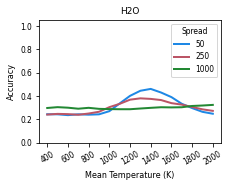

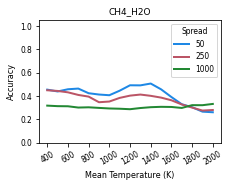

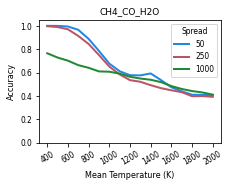

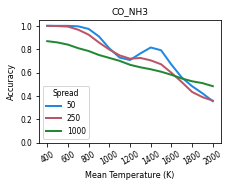

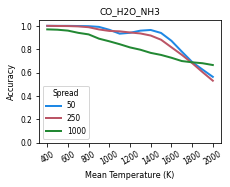

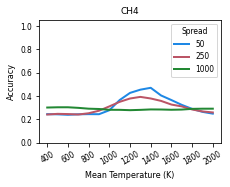

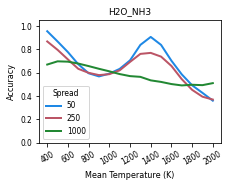

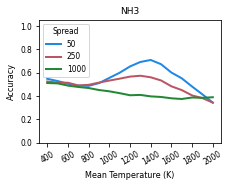

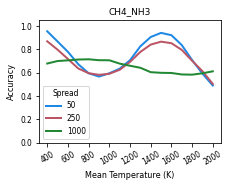

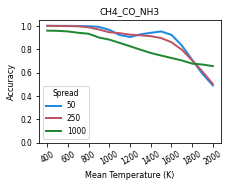

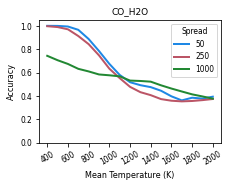

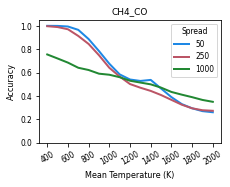

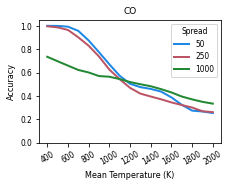

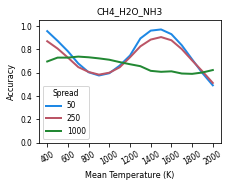

In [49]:
import glob 

result_dir = "/Users/hkim78/work/2020-hotJupiter/ML/results/accuracy/abundance/"

input_paths = dict()

list_com_var = list()

for file_path in glob.glob(result_dir +"*.json"):
    
    var = file_path.split("abundance/")[1].split("_accuracy")[0]
    list_com_var.append(var)
    # input_paths[var] = file_path
    
    with open(file_path) as infile:
        a = json.load(infile)
        
    print(a)
    
    list_cc = ['#1E88E5', '#BB5566', '#228833']

    plt.figure(figsize=(3.3, 2.7))
    i = 0
    for spread in ["50", "250", "1000"]:
        plt.plot(a[spread], label=spread, linewidth=2, color=list_cc[i])

        plt.xticks(np.arange(0, 17, 2), np.arange(400, 2100, 200), fontsize=7.5, rotation=30)
        plt.yticks(fontsize=7.5)
        plt.xlabel("Mean Temperature (K)", fontsize=8)
        plt.ylabel("Accuracy", fontsize=8)
        i += 1

    plt.title("%s"%var, fontsize=9)
    plt.ylim([0.0,1.05])
    # lines = plt.gca().get_lines()
    # legend_spread = plt.legend([lines[i] for i in np.arange(0, 3)], ["50", "250", "1000"],
    #                            prop={"size":5}, title='Spread', bbox_to_anchor=(0.0, 0.15, 0.3, 0.3))
    legend_spread = plt.legend(prop={"size":7.5}, title='Spread')#, bbox_to_anchor=(0.05, 0.22, 0.32, 0.3))
    plt.setp(legend_spread.get_title(), fontsize= 7.5)
    plt.tight_layout()
    plt.savefig(dir_plot + "accuracy_%s.png"%var, dpi=90)
    plt.show()